<a href="https://colab.research.google.com/github/JBGitHub2020/Coder_entregas/blob/main/Segunda_Entrega_Peralta_Mamoli_Beaudoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# PREDICCIÓN DE LA POSIBLE ADHESIÓN A UN PLAZO FIJO DE LOS CLIENTES DE UN BANCO

# INTRODUCCION

Nuestro cliente, una billetera virtual , está analizando ampliar la cartera de productos para sus clientes, así como para posibles prospectos. Entre sus alternativas se encuentra la de ofrecer depósitos a plazo fijo.
Con la intención de relevar la posible adhesión a este nuevo  producto, la institución ha realizado una campaña de marketing directo estableciendo contactos telefónicos con cada uno de sus clientes, con el fin de palpar la sensibilidad y aprovechar la oportunidad del contacto. Es importante remarcar que, en ocasiones, se requirió más de un contacto con el mismo cliente para entender si el cliente se suscribiría o no al plazo fijo.
Como resultado de la campaña se ha obtenido un dataset con un número de variables conteniendo distintos aspectos de la misma que, sumado a los datos de los clientes del banco, a algunos datos coyunturales y ciertos ratios económicos, nos han sido entregados para ser analizados. 
El objetivo final del estudio es predecir si un cliente es pasible de suscribirse a un plazo fijo y, además, identificar la existencia de patrones comunes (si los hubiera) que permitan definir clusters en vista a ofrecer plazos fijos a posibles prospectos ya segmentados.
Con los datos obtenidos surgen las primeras preguntas del análisis relacionadas con los datos de los clientes del banco y las propias de la campaña de marketing directo. 
 

OBJETIVO:
Predecir el comportamiento de los clientes mediante la utilización de algoritmos de clasifiación, identificando las variables "Core" que determinan la propensión a la adhesión a un plazo fijo.  

CONTEXTO COMERCIAL:
Totalcoin es una billetera virtual creada en el 2010. Nace con la finalidad de ofrecer soluciones digitales para todos los que quieran mantener un control sobre sus pagos y cobros.
Entre los productos por lanzar para este año, se encuentrá la opción de plazos fijos para sus clientes. De manera de sondear la posible adhesión, ha realizado una campaña de Marketing Directo a través de contactos telefónicos.
Totalcoin nos ha contratado para analizar los resultados de la campaña.  

PROBLEMA COMERCIAL:
El problema es explorar los datos para poder responder a las siguientes preguntas:
¿Existen características en nuestos clientes que permitan determinar la propensión a un plazo fijo? ¿De que manera influye la campaña en la respuesta  del cliente?  

CONTEXTO ANALITICO: El departamento de marketing nos ha proporcionado una base de datos de los clientes que contiene información sobre varios atributos como edad, educación, trabajo, estado civil,  etc. y el resultado de la campaña de Marketing Directo. 

Estructuraremos el caso de la siguiente manera: En primer lugar vamos a realizar un análisis de datos exploratorio para investigar visualmente las características de los clientes; en segundo lugar analizaremos los datos de la campaña;  finalemnte utilizaremos los resultados obtenidos y observados para armar los modelos de clasificación y así poder concluir acerca de la existencia de caracteristicas que permitan identificar patrones comunes en los clientes con propensión a la adhesión de un plazo fijo .

IMPORTACIÓN DE LAS LIBRERÍAS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.ticker import FormatStrFormatter
from matplotlib import rcParams
import matplotlib.pyplot as plt 
from seaborn import boxplot 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

ADQUISICIÓN DE DATOS

In [ ]:
from google.colab import drive
import os
drive.mount("/content/gdrive")

Mounted at /content/gdrive


*Se adjunta link de búsqueda y archivo txt del DS. http://archive.ics.uci.edu/ml/datasets/Bank+Marketing.*


In [ ]:
# Importamos el DataSet
%cd "/content/gdrive/MyDrive/CODERHOUSE_DESAFIOS"
ds3= pd.read_csv("bank-additional-full.csv",delimiter=";")
ds3

/content/gdrive/MyDrive/CODERHOUSE_DESAFIOS


age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

*DESCRIPCIÓN DE VARIABLES*

VARIABLES INPUT:

 Datos de los clientes del banco:
 
•	age: edad del cliente  (variable numérica)

•	job : tipo de trabajo del cliente (variable categórica: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

•	 marital: estado civil del cliente (variable categórica: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

•	Education: nivel de educación del cliente (variable categórica: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

•	default: si el cliente tiene un préstamo/crédito en default (variable categórica: 'no','yes','unknown')

•	housing: si el cliente posee crédito hipotecario (variable categórica: 'no','yes','unknown')

•	loan: si el cliente posee préstamo personal (variable categórica: 'no','yes','unknown')


 Datos relacionados con el último contacto de la actual campaña:

•	contact: tipo de contacto (variable categórica: 'cellular','telephone')

•	month: mes del último contacto (variable categórica: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

•	day_of_week: día de la semana del último contacto (variable categórica: 'mon','tue','wed','thu','fri')

•	duration: duración de la último contacto - en segundos  (variable numérica). Importante, este atributo afecta en gran medida el objetivo de salida (e.j., si la duración =0 entonces y='no'). Sin embargo la duración no se conoce antes de realizarse la llamada. Además, después de finalizar la llamada es obviamente conocido. Por este motivo, este input debe ser incluido solo con fines de referencia y debe descartarse si la intención es tener un modelo predictivo realista. 


 Otros atributos:

•	campaign: cantidad de contactos realizados durante la campaña para el cliente (variable numérica, incluye el último contacto)

•	pdays: cantidad de días desde que el cliente fue contactado por última vez en otra campaña (variable numérica; 999 significa que el cliente no fue contactado anteriormente)

•	previous: cantidad de contactos realizados previos a esta campaña para el cliente (variable numérica)

•	poutcome: resultado de la campaña anterior (variable categórica: 'failure','nonexistent','success')

 Atributos del contexto social y económico 

•	emp.var.rate: Tasa de variación de empleo – indicador trimestral (numérico)

•	cons.price.idx: Índice de precios al consumidor – indicador mensual (numérico)

•	cons.conf.idx: Índice de confianza del consumidor - indicador mensual (numérico)

•	euribor3m: tipo de interés aplicado a las operaciones entre bancos (tasa de 3 meses) – indicador diario (numérico)

•	nr.employed: Cantidad de empleados – indicador trimestral (numérico)



 VARIABLE OUTPUT (Target):

•	y – si el cliente se ha suscripto a un plazo fijo (variable binaria: 'yes','no')


# DATA WRANGLING

In [ ]:
ds3.shape

(41188, 21)

El dataset obtenido posee 41.188 filas y veintiuna columnas, de las cuales veinte son variables independientes a analizar y una corresponde a la variable dependiente.  

Identificamos  las variables numéricas, las categóricas y verificamos si hay nulos 

In [ ]:
ds3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
ds3.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

El dataset no  posee datos nulos, posee once variables categóricas y diez numéricas.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


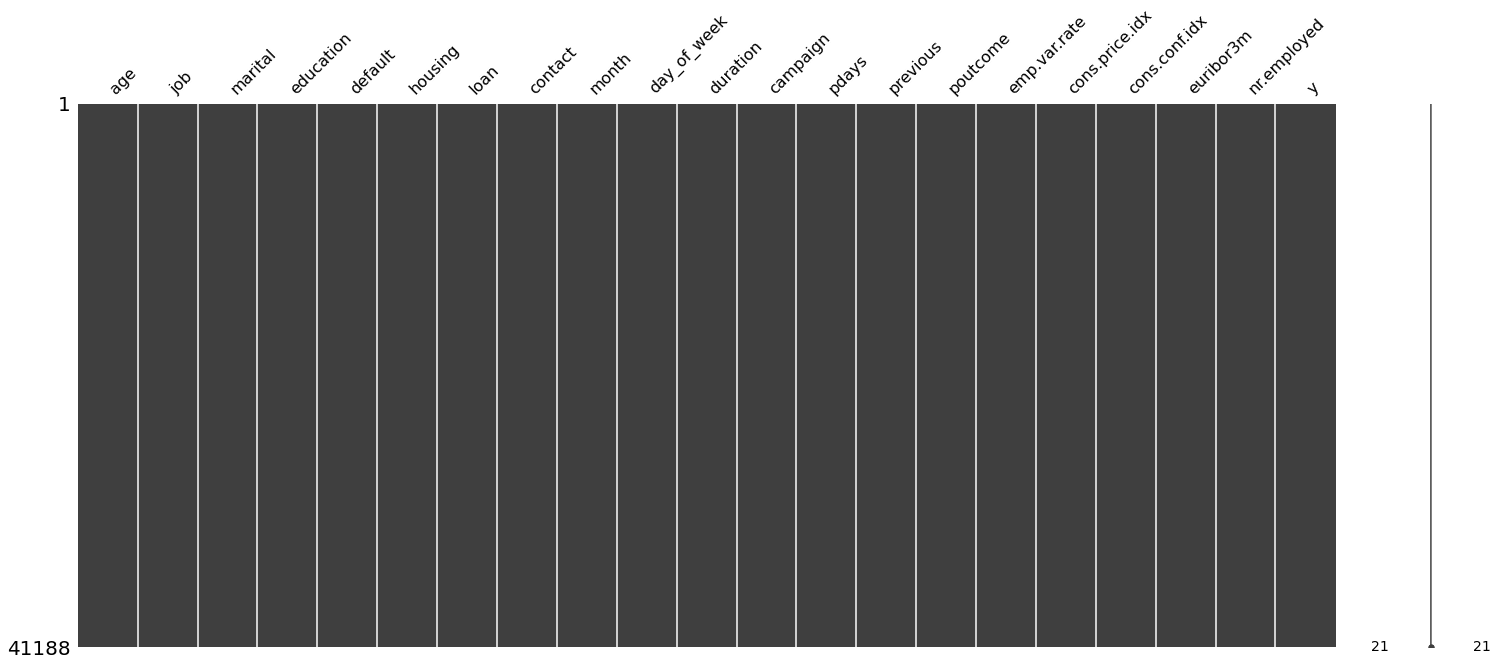

In [ ]:
!pip install missingno
import missingno as msno
msno.matrix(ds3)

Analizamos la existencia de duplicados

In [ ]:
ds3.duplicated().value_counts()

False    41176
True        12
dtype: int64

El dataset posee 12 filas repetidas que procederemos a eliminar.

In [ ]:
dfsd = ds3.drop_duplicates().reset_index(drop=True)
dfsd.head(5)

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [ ]:
dfsd.duplicated().value_counts()

False    41176
dtype: int64

In [ ]:
dfsd.tail(5)

age          job  marital            education default housing loan  \
41171   73      retired  married  professional.course      no     yes   no   
41172   46  blue-collar  married  professional.course      no      no   no   
41173   56      retired  married    university.degree      no     yes   no   
41174   44   technician  married  professional.course      no      no   no   
41175   74      retired  married  professional.course      no     yes   no   

        contact month day_of_week  ...  campaign  pdays  previous  \
41171  cellular   nov         fri  ...         1    999         0   
41172  cellular   nov         fri  ...         1    999         0   
41173  cellular   nov         fri  ...         2    999         0   
41174  cellular   nov         fri  ...         1    999         0   
41175  cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
41171  nonexistent         -1.1          94.767          -50.8      1.028   
41172  nonexistent         -1.1          94.767          -50.8      1.028   
41173  nonexistent         -1.1          94.767          -50.8      1.028   
41174  nonexistent         -1.1          94.767          -50.8      1.028   
41175      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
41171       4963.6  yes  
41172       4963.6   no  
41173       4963.6   no  
41174       4963.6  yes  
41175       4963.6   no  

[5 rows x 21 columns]

In [ ]:
dfsd.shape

(41176, 21)

Una vez eliminadas las filas repetidas, el dataset queda con 41.176 filas y 21 columnas 

Analizamos la cantidad de categorías que tiene cada variable

In [ ]:
dfsd["age"].unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89])

In [ ]:
dfsd["job"].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [ ]:
dfsd["marital"].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [ ]:
dfsd["education"].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [ ]:
dfsd["default"].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [ ]:
dfsd["housing"].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [ ]:
dfsd["loan"].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [ ]:
dfsd["contact"].unique()

array(['telephone', 'cellular'], dtype=object)

In [ ]:
dfsd["month"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [ ]:
dfsd["day_of_week"].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [ ]:
dfsd["duration"].unique()

array([ 261,  149,  226, ..., 1246, 1556, 1868])

In [ ]:
dfsd["campaign"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 23, 14,
       22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29,
       31, 30, 41, 37, 40, 33, 34, 43])

In [ ]:
dfsd["pdays"].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

In [ ]:
dfsd["previous"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
dfsd["poutcome"].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [ ]:
dfsd["emp.var.rate"].unique()

array([ 1.1,  1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3. , -1.7, -1.1])

In [ ]:
dfsd["cons.price.idx"].unique()

array([93.994, 94.465, 93.918, 93.444, 93.798, 93.2  , 92.756, 92.843,
       93.075, 92.893, 92.963, 92.469, 92.201, 92.379, 92.431, 92.649,
       92.713, 93.369, 93.749, 93.876, 94.055, 94.215, 94.027, 94.199,
       94.601, 94.767])

In [ ]:
dfsd["cons.conf.idx"].unique()

array([-36.4, -41.8, -42.7, -36.1, -40.4, -42. , -45.9, -50. , -47.1,
       -46.2, -40.8, -33.6, -31.4, -29.8, -26.9, -30.1, -33. , -34.8,
       -34.6, -40. , -39.8, -40.3, -38.3, -37.5, -49.5, -50.8])

In [ ]:
dfsd["euribor3m"].unique()

array([4.857, 4.856, 4.855, 4.859, 4.86 , 4.858, 4.864, 4.865, 4.866,
       4.967, 4.961, 4.959, 4.958, 4.96 , 4.962, 4.955, 4.947, 4.956,
       4.966, 4.963, 4.957, 4.968, 4.97 , 4.965, 4.964, 5.045, 5.   ,
       4.936, 4.921, 4.918, 4.912, 4.827, 4.794, 4.76 , 4.733, 4.7  ,
       4.663, 4.592, 4.474, 4.406, 4.343, 4.286, 4.245, 4.223, 4.191,
       4.153, 4.12 , 4.076, 4.021, 3.901, 3.879, 3.853, 3.816, 3.743,
       3.669, 3.563, 3.488, 3.428, 3.329, 3.282, 3.053, 1.811, 1.799,
       1.778, 1.757, 1.726, 1.703, 1.687, 1.663, 1.65 , 1.64 , 1.629,
       1.614, 1.602, 1.584, 1.574, 1.56 , 1.556, 1.548, 1.538, 1.531,
       1.52 , 1.51 , 1.498, 1.483, 1.479, 1.466, 1.453, 1.445, 1.435,
       1.423, 1.415, 1.41 , 1.405, 1.406, 1.4  , 1.392, 1.384, 1.372,
       1.365, 1.354, 1.344, 1.334, 1.327, 1.313, 1.299, 1.291, 1.281,
       1.266, 1.25 , 1.244, 1.259, 1.264, 1.27 , 1.262, 1.26 , 1.268,
       1.286, 1.252, 1.235, 1.224, 1.215, 1.206, 1.099, 1.085, 1.072,
       1.059, 1.048,

In [ ]:
dfsd["nr.employed"].unique()

array([5191. , 5228.1, 5195.8, 5176.3, 5099.1, 5076.2, 5017.5, 5023.5,
       5008.7, 4991.6, 4963.6])

In [ ]:
dfsd["y"].unique()

array(['no', 'yes'], dtype=object)

Vemos que de las variables categóricas, la variable educación tiene muchos niveles de educación básica, vamos a agruparlos en una única categoría "Basic".

In [ ]:
dfsd['education']=np.where(dfsd['education'] =='basic.9y', 'Basic', dfsd['education'])
dfsd['education']=np.where(dfsd['education'] =='basic.6y', 'Basic', dfsd['education'])
dfsd['education']=np.where(dfsd['education'] =='basic.4y', 'Basic', dfsd['education'])

In [ ]:
dfsd["education"].unique()

array(['Basic', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'illiterate'], dtype=object)

# ANÁLISIS EXPLORATORIO DE DATOS 

Principales indicadores estadísticos

In [ ]:
ds3.describe().transpose()


count         mean         std       min       25%  \
age             41188.0    40.024060   10.421250    17.000    32.000   
duration        41188.0   258.285010  259.279249     0.000   102.000   
campaign        41188.0     2.567593    2.770014     1.000     1.000   
pdays           41188.0   962.475454  186.910907     0.000   999.000   
previous        41188.0     0.172963    0.494901     0.000     0.000   
emp.var.rate    41188.0     0.081886    1.570960    -3.400    -1.800   
cons.price.idx  41188.0    93.575664    0.578840    92.201    93.075   
cons.conf.idx   41188.0   -40.502600    4.628198   -50.800   -42.700   
euribor3m       41188.0     3.621291    1.734447     0.634     1.344   
nr.employed     41188.0  5167.035911   72.251528  4963.600  5099.100   

                     50%       75%       max  
age               38.000    47.000    98.000  
duration         180.000   319.000  4918.000  
campaign           2.000     3.000    56.000  
pdays            999.000   999.000   999.000  
previous           0.000     0.000     7.000  
emp.var.rate       1.100     1.400     1.400  
cons.price.idx    93.749    93.994    94.767  
cons.conf.idx    -41.800   -36.400   -26.900  
euribor3m          4.857     4.961     5.045  
nr.employed     5191.000  5228.100  5228.100

**EDA**

Analizamos la distribución de las adhesiones al plazo fijo, preguntándonos ¿cuántos de nuestros clientes son propensos a adherirse a un plazo fijo?

In [ ]:
dfsd ["y"].value_counts()

no     36537
yes     4639
Name: y, dtype: int64

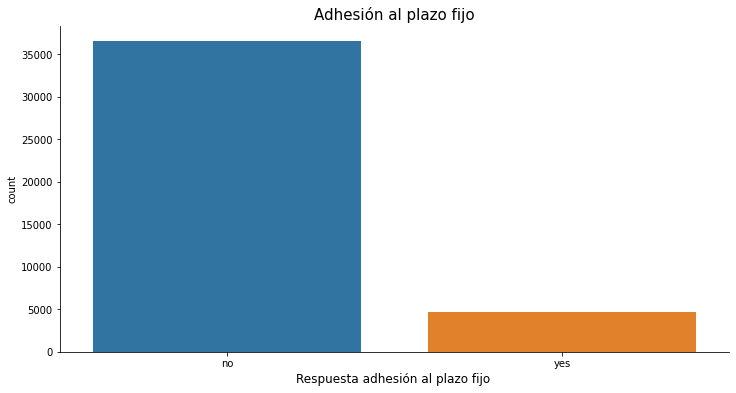

In [ ]:
yon = sns.countplot(x="y", data=dfsd)
yon.set_title("Adhesión al plazo fijo",  fontsize= 15)
yon.set_xlabel("Respuesta adhesión al plazo fijo ", fontsize= 12)
plt.gcf().set_size_inches(12, 6)
plt.grid(False)
yon.spines['right'].set_visible(False)
yon.spines['top'].set_visible(False)


Convertimos la variable target en numérica para sacar porcentajes

In [ ]:
# pasamos "y" de categórica a numérica
yin = pd.get_dummies(dfsd, columns =["y"] ,drop_first =True)
yin

age          job  marital            education  default housing loan  \
0       56    housemaid  married                Basic       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married                Basic       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41171   73      retired  married  professional.course       no     yes   no   
41172   46  blue-collar  married  professional.course       no      no   no   
41173   56      retired  married    university.degree       no     yes   no   
41174   44   technician  married  professional.course       no      no   no   
41175   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41171   cellular   nov         fri  ...         1    999         0   
41172   cellular   nov         fri  ...         1    999         0   
41173   cellular   nov         fri  ...         2    999         0   
41174   cellular   nov         fri  ...         1    999         0   
41175   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41171  nonexistent         -1.1          94.767          -50.8      1.028   
41172  nonexistent         -1.1          94.767          -50.8      1.028   
41173  nonexistent         -1.1          94.767          -50.8      1.028   
41174  nonexistent         -1.1          94.767          -50.8      1.028   
41175      failure         -1.1          94.767          -50.8      1.028   

       nr.employed  y_yes  
0           5191.0      0  
1           5191.0      0  
2           5191.0      0  
3           5191.0      0  
4           5191.0      0  
...            ...    ...  
41171       4963.6      1  
41172       4963.6      0  
41173       4963.6      0  
41174       4963.6      1  
41175       4963.6      0  

[41176 rows x 21 columns]

In [ ]:
# volvemos a nombrar a la variable target "y"
xr_yn = yin.rename(columns={'y_yes': 'y'})
xr_yn

age          job  marital            education  default housing loan  \
0       56    housemaid  married                Basic       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married                Basic       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41171   73      retired  married  professional.course       no     yes   no   
41172   46  blue-collar  married  professional.course       no      no   no   
41173   56      retired  married    university.degree       no     yes   no   
41174   44   technician  married  professional.course       no      no   no   
41175   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41171   cellular   nov         fri  ...         1    999         0   
41172   cellular   nov         fri  ...         1    999         0   
41173   cellular   nov         fri  ...         2    999         0   
41174   cellular   nov         fri  ...         1    999         0   
41175   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41171  nonexistent         -1.1          94.767          -50.8      1.028   
41172  nonexistent         -1.1          94.767          -50.8      1.028   
41173  nonexistent         -1.1          94.767          -50.8      1.028   
41174  nonexistent         -1.1          94.767          -50.8      1.028   
41175      failure         -1.1          94.767          -50.8      1.028   

       nr.employed  y  
0           5191.0  0  
1           5191.0  0  
2           5191.0  0  
3           5191.0  0  
4           5191.0  0  
...            ... ..  
41171       4963.6  1  
41172       4963.6  0  
41173       4963.6  0  
41174       4963.6  1  
41175       4963.6  0  

[41176 rows x 21 columns]

Sacamos el porcentaje de cada categoría de la variables target, ¿cuál es el porcentaje de clientes propensos a adherirse a un plazo fijo?

In [ ]:
count_no_adh = len(xr_yn[xr_yn['y']==0])
count_adh = len(xr_yn[xr_yn['y']==1])
pct_no_adh = count_no_adh/(count_no_adh+count_adh)
print("El porcentage de no adhesión al plazo fijo es del", round(pct_no_adh*100), "% de los clientes,")
pct_adh = count_adh/(count_no_adh+count_adh)
print("mientras que el porcentage de adhesión al plazo fijo es del", round(pct_adh*100),"% de los clientes.")

El porcentage de no adhesión al plazo fijo es del 89 % de los clientes,
mientras que el porcentage de adhesión al plazo fijo es del 11 % de los clientes.


In [ ]:
import plotly.graph_objects as go 
colors=['blue','orange' ]
fig= go.Figure(data=[go.Pie(labels=['Adverso a adherirse a un Plazo Fijo','Propenso a adherirse a un Plazo Fijo'],
                            values=[89,11])])
fig.update_traces(hoverinfo='label+percent', textfont_size=15,
                  textinfo= 'label+percent',pull=[0.1, 0.1],
                  marker=dict(colors=colors, line=dict(color='#FFFFFF',
                                                       width=2)))

El dataset está desbalanceado teniendo en cuenta la proporción de adhesiones vs. no adhesiones.

Analizamos un poco los datos para entender algunas características de los adherentes al plazo fijo

In [ ]:
xr_yn.groupby("y").mean()

age    duration  campaign       pdays  previous  emp.var.rate  \
y                                                                        
0  39.910994  220.868079  2.633385  984.109396  0.132414      0.248885   
1  40.912266  553.256090  2.051951  791.990946  0.492779     -1.233089   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
y                                                         
0       93.603798     -40.593232   3.811482  5176.165690  
1       93.354577     -39.791119   2.123362  5095.120069

La edad promedio de los clientes (age) que se adhieren al plazo fijo es de 41 años, siendo ésta apenas superior a la de los que no se adhieren.

La duración de las llamadas (duration) fue superior para los clientes que se adhirieron al plazo fijo. Puediendo entenderse por el interés en la información y los datos que tuvieran que brindar. Por otro lado, los que no se adhirieron pudieron demostrar desinterés a los pocos segundos de iniciada la llamada.

La cantidad de contactos durante la campaña (campaign) fue inferior en los no adherentes, pudiendose entender que la decisión se tomo en uno o dos llamados.



# VISUALIZACIONES


1) Analizamos los datos de la cartera de clientes

1.1) Rangos etarios de los clientes del banco, ¿cómo esta compuesta la cartera de clientes en función de la edad?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



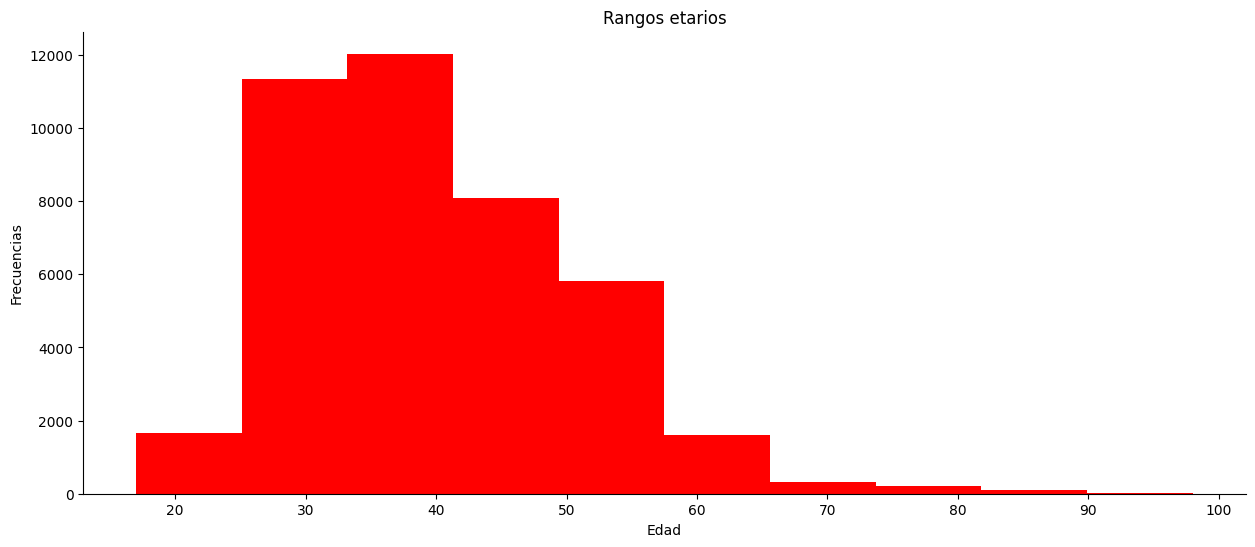

In [ ]:
xr_yn.age.hist( color = "red" )
plt.title('Rangos etarios')
plt.xlabel('Edad')
plt.ylabel('Frecuencias')
plt.gcf().set_size_inches(15, 6)
plt.grid(False)
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

La mayoría de los clientes del banco están en el rango de 30-40 años.

Analizamos las adhesiones a plazo fijo en función de la edad ¿En qué franja etaria se concentran los clientes más propensos a adherirse a un plazo fijo? 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



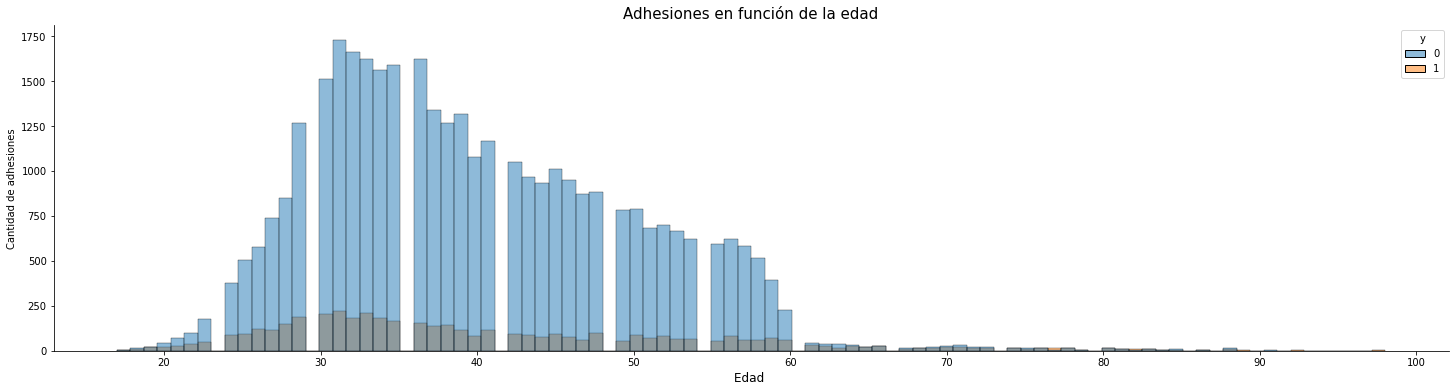

In [ ]:
p= sns.histplot(data=xr_yn, x="age", hue= "y")
plt.gcf().set_size_inches(25, 6)
p.set_title("Adhesiones en función de la edad",  fontsize= 15)
p.set_xlabel("Edad ", fontsize= 12)
plt.ylabel('Cantidad de adhesiones')
plt.grid(False)
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

En términos absolutos la mayor cantidad de adhesiones se encuentra en el rango de 30-40 años (existiendo una relación directa con la cantidad de clientes de esa franja etaria).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



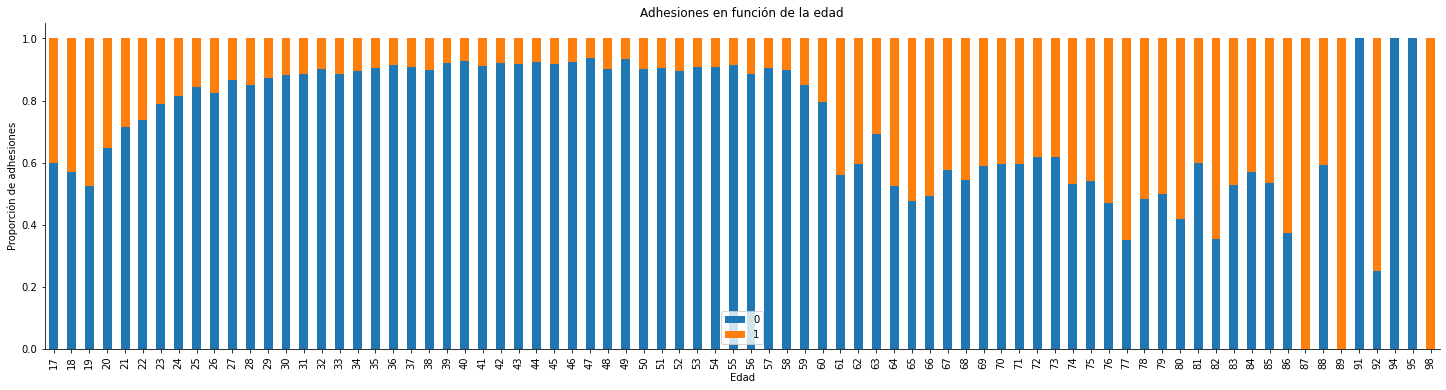

In [ ]:
%matplotlib inline
table=pd.crosstab(xr_yn.age,xr_yn.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(25, 6)
plt.title('Adhesiones en función de la edad')
plt.xlabel('Edad')
plt.ylabel('Proporción de adhesiones')
plt.legend(loc="best")
plt.grid(False)
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Si bien en términos absolutos la mayor cantidad de adhesiones se encuentra en el rango de 30-40 años (respondiendo al rango de  mayor cantidad de clientes), vemos que  en proporción, las adhesiones son mayores para los clientes de menos de 30 años y de más de 60 años.

1.2) Nivel de educación de los clientes del banco

In [ ]:
import plotly.graph_objects as go 
colors=['blue','green','black','purple','red','brown' ]
fig= go.Figure(data=[go.Pie(labels=['Basic','Unknown','University',
                                    'Profesional Course','Iliterate','High School'],
                            values=[30.4,4.2,29.5,12.7,0.0,23.1])])
fig.update_traces(hoverinfo='label+percent', textfont_size=15,
                  textinfo= 'label+percent',title= "Distribución de los clientes según nivel de educación", titlefont_size=17, pull=[0.1, 0, 0.2, 0, 0, 0.1],
                  marker=dict(colors=colors, line=dict(color='#FFFFFF',
                                                       width=2)))


Se puede observar que más del 60% de los clientes del banco (65,3%) está fuertemente instruida con nivel de educación secundaria o superior, de los cuales un 42,2% posee grado college o universitario completo.

Analizamos las adhesiones a plazo fijo en función de la educación

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



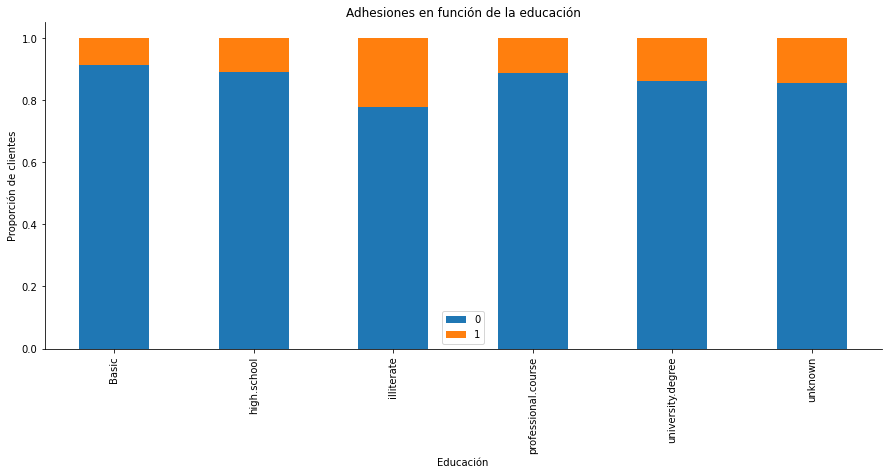

In [ ]:
table1=pd.crosstab(xr_yn.education,xr_yn.y)
table1.div(table1.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(15, 6)
plt.title('Adhesiones en función de la educación')
plt.xlabel('Educación')
plt.ylabel('Proporción de clientes')
plt.legend(loc="best")
plt.grid(False)
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

La variable nivel de educación también puede ser de gran utilidad como variable predictora.

1.3) Ocupación de los clientes del banco

In [ ]:
colors=['blue','green','black','purple','red','brown', 'yellow', 'pink', 'skyblue', 'orange', 'grey', 'magenta']
fig= go.Figure(data=[go.Pie(labels=['Blue Collar','Administrative','Unknown', 'Unemployed', 'Technican', 'Student',
                                    'Services','Self Employed','Retired', 'Management', 'Housemaid', 'Entrepreneur'],
                            values=[22.5,25.3,0.8,2.5,16.4,2.1,9.6,3.5,4.2,7.1,2.6,3.5])])
fig.update_traces(hoverinfo='label+percent', textfont_size=10,
                  textinfo= 'label+percent',title= "Distribución de los clientes según ocupación", titlefont_size=17, pull=[0.2, 0.2, 0.0, 0.0, 0.1, 0.0,0.1, 0.0, 0.0, 0.0, 0.0, 0.0],
                  marker=dict(colors=colors, line=dict(color='#FFFFFF',
                                                       width=2)))

En función de la ocupación, podemos ver que el 64% de la cartera se distribuye entre empleados administrativos, trabajadores de la industria y técnicos.

Analizamos las adhesiones a plazo fijo en función de la ocupación

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



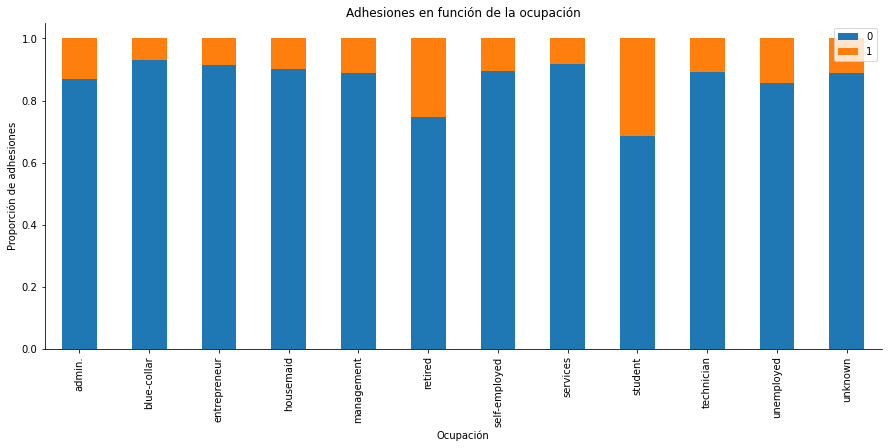

In [ ]:
%matplotlib inline
table0=pd.crosstab(xr_yn.job,xr_yn.y)
table0.div(table0.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(15, 6)
plt.title('Adhesiones en función de la ocupación')
plt.xlabel('Ocupación')
plt.ylabel('Proporción de adhesiones')
plt.legend(loc="best")
plt.grid(False)
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

La cantidad de adhesiones a plazo fijo depende en gran medida a la ocupación. Podemos decir que la ocupación puede ser una buena variable predictora.

1.4) Estado civil de los clientes del banco

In [ ]:
colors=['blue','green', "black",'red']
fig= go.Figure(data=[go.Pie(labels=['Married','Divorced','Unknown', 'Single'],
                            values=[60.5,11.2,0.2,28.1])])
fig.update_traces(hoverinfo='label+percent', textfont_size=12,
                  textinfo= 'label+percent',pull=[0.2, 0.2, 0.0, 0.0, 0.1, 0.0,0.1, 0.0, 0.0, 0.0, 0.0, 0.0],
                  marker=dict(colors=colors, line=dict(color='#FFFFFF',
                                                       width=2)))

Más del 60% de los clientes del banco están casados.

Analizamos las adhesiones a plazo fijo en función del estado civil

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



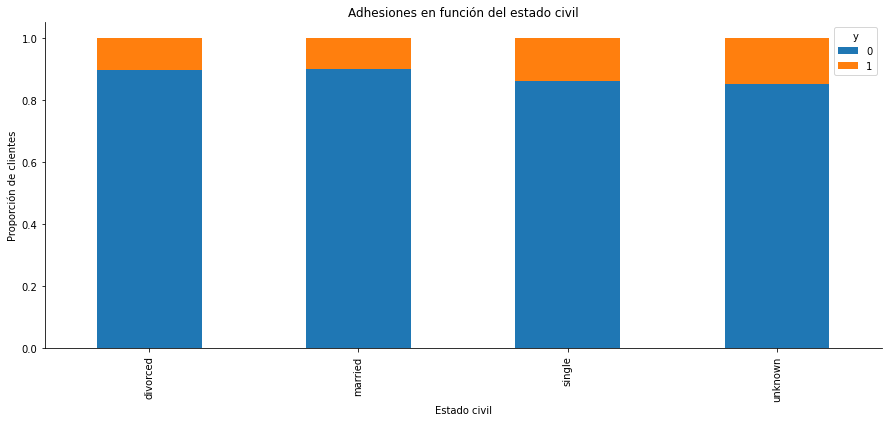

In [ ]:
table2=pd.crosstab(xr_yn.marital,xr_yn.y)
table2.div(table2.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(15, 6)
plt.title('Adhesiones en función del estado civil')
plt.xlabel('Estado civil')
plt.ylabel('Proporción de clientes')
plt.grid(False)
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

El estado civil de los clientes no sería determinante para definir la propensión o aversión a la adhesión a un Plazo Fijo.  

2) Analizamos algunos datos de la campaña de Marketing Directo

2.1) Adhesiones en función del tipo de contacto (teléfono fijo o celular) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



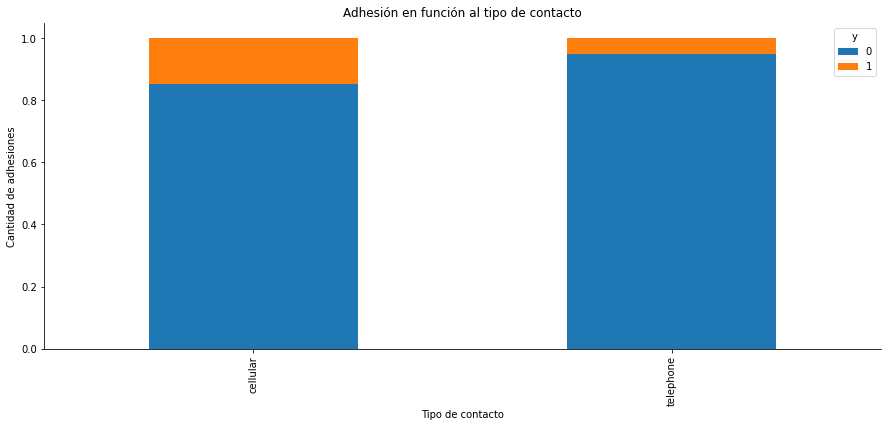

In [ ]:
table3= pd.crosstab(xr_yn.contact,xr_yn.y)
table3.div(table3.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(15, 6)
plt.title('Adhesión en función al tipo de contacto')
plt.gcf().set_size_inches(15, 6)
plt.xlabel('Tipo de contacto')
plt.ylabel('Cantidad de adhesiones')
plt.grid(False)
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

El tipo de contacto podría ser una buena variable predictora.

2.2) Adhesiones en función del día de la semana en que se estableció  el contacto

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



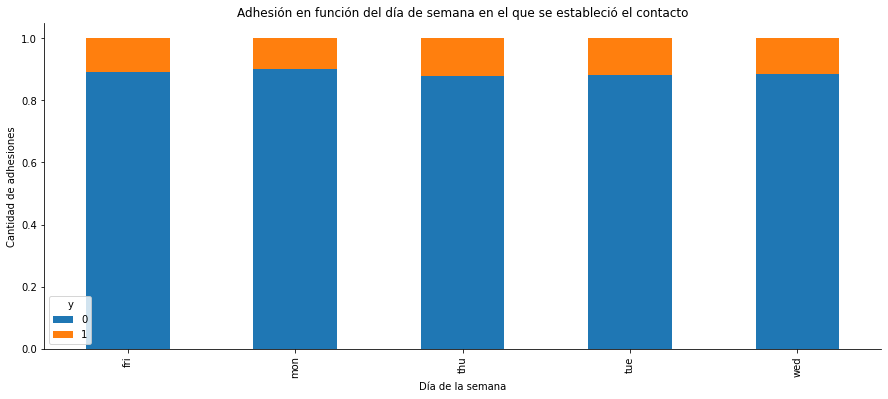

In [ ]:
table4= pd.crosstab(xr_yn.day_of_week,xr_yn.y)
table4.div(table4.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(15, 6)
plt.title('Adhesión en función del día de semana en el que se estableció el contacto')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de adhesiones')
plt.grid(False)
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


El día de la semana no parecería ser una variable predictora.

2.3) Adhesiones en función del mes en el que se estableció el contacto 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



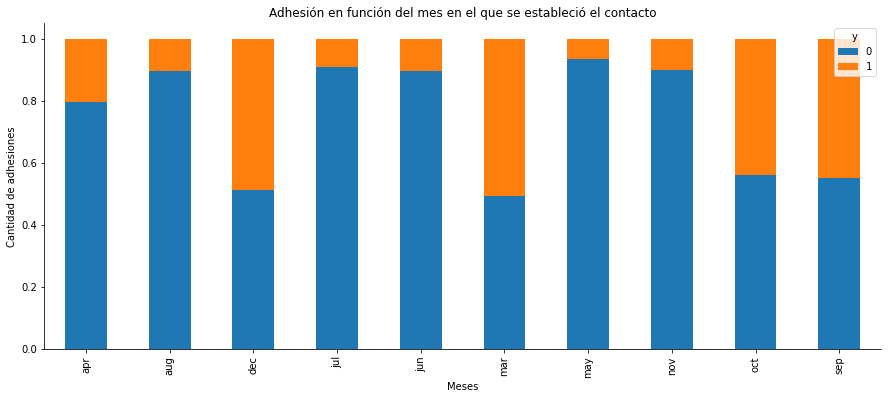

In [ ]:
table5= pd.crosstab(xr_yn.month,xr_yn.y)
table5.div(table5.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(15, 6)
plt.title('Adhesión en función del mes en el que se estableció el contacto')
plt.xlabel('Meses')
plt.ylabel('Cantidad de adhesiones')
plt.grid(False)
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


El mes de contacto parecería ser una variable predictora.

2.4) Adhesiones en función de la cantidad de llamadas de la última campaña

In [ ]:
# Llamadas por cliente campaña actual 
sorted_num_campaing=sorted(xr_yn.campaign.unique())
print(sorted_num_campaing)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 39, 40, 41, 42, 43, 56]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



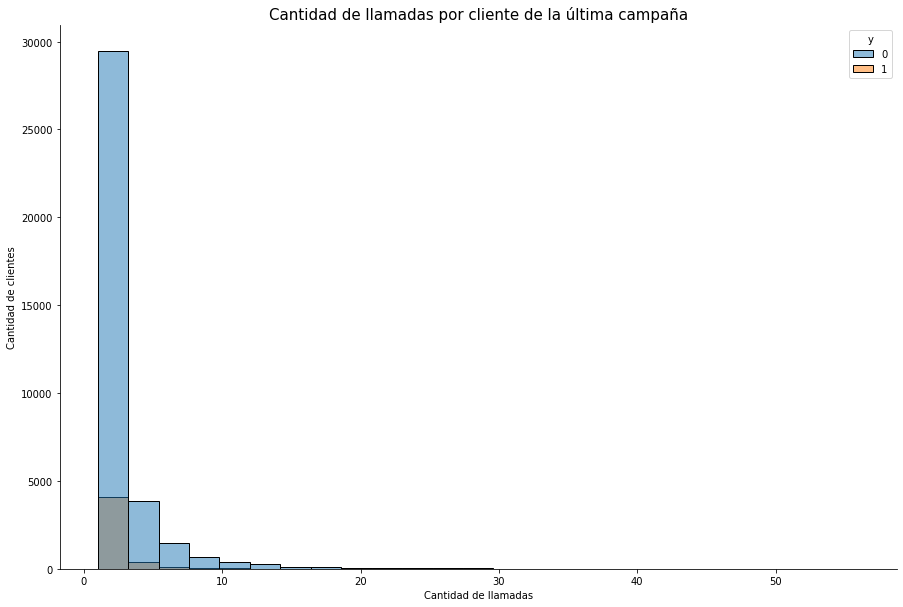

In [ ]:
# Cantidad de llamadas por cliente
v= sns.histplot(data=xr_yn, x="campaign", hue="y", bins=25)
v.set_title("Cantidad de llamadas por cliente de la última campaña",  fontsize= 15)
plt.gcf().set_size_inches(15, 10)
plt.xlabel('Cantidad de llamadas')
plt.ylabel('Cantidad de clientes')
plt.grid(False)
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Más de la mitad de los clientes fueron contactados una sola vez durante esta campaña y fue en este llamado (en la mayoría de los casos) en el que se concretó la adhesión.
Cantidad de llamados parece ser una buena variable predictora.

2.5) Adhesiones en función del resultado de campañas anteriores 

In [ ]:
# Contactos por cliente campañas anteriores
xr_yn.previous.unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
df_previous=xr_yn[['previous',"poutcome"]].groupby(by=[ "poutcome"]).count().reset_index()
df_previous

poutcome  previous
0      failure      4252
1  nonexistent     35551
2      success      1373

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



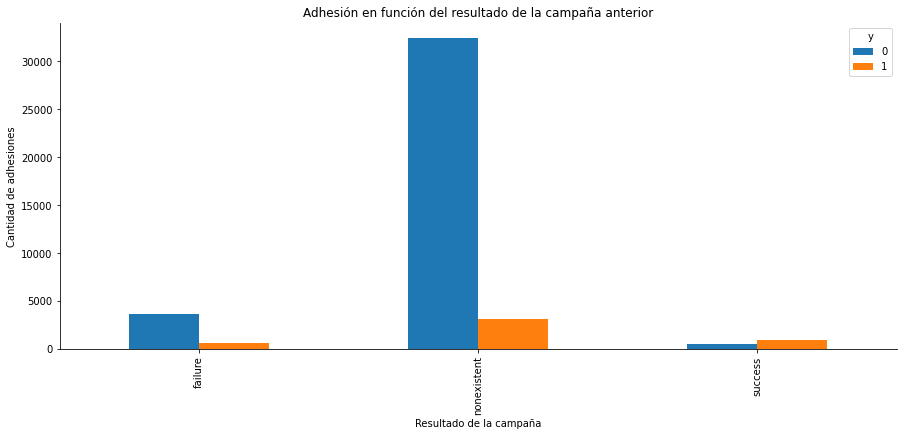

In [ ]:
pd.crosstab(xr_yn.poutcome,xr_yn.y).plot(kind='bar')
plt.gcf().set_size_inches(15, 6)
plt.title('Adhesión en función del resultado de la campaña anterior')
plt.xlabel('Resultado de la campaña')
plt.ylabel('Cantidad de adhesiones')
plt.grid(False)
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

El resultado de campañas anteriores parace ser un buen predictor de la variable target.

#ANÁLISIS BIVARIADO

Realizamos un análisis básico con Pandas Profiling

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     | 22.0 MB 147 kB/s
     |████████████████████████████████| 297 kB 7.9 MB/s 
     |████████████████████████████████| 102 kB 14.7 MB/s 
     |████████████████████████████████| 690 kB 41.8 MB/s 
     |████████████████████████████████| 4.7 MB 45.3 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 9.8 MB 35.6 MB/s 
     |████████████████████████████████| 296 kB 47.2 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.3.1-py2.py3-none-any.whl size=310107 sha256=5ecfe4eddf725811fa3d7e7e1272f4256e521fadf1dc0df421e68674933a2379
  Stored in directory: /tmp/pip-ephem-wheel-cache-lvxr97_z/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=24cab1756bea2e12ce397e78975b31cf57349ea4625ea924d5c307a1f2ba2cdc
  Stored in director

In [ ]:
import pandas_profiling

In [ ]:
perfil = pandas_profiling.ProfileReport(dfsd)
perfil

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Dependecias variables numéricas

In [ ]:
dfsd.corr()

age  duration  campaign     pdays  previous  \
age             1.000000 -0.000808  0.004622 -0.034381  0.024379   
duration       -0.000808  1.000000 -0.071765 -0.047556  0.020600   
campaign        0.004622 -0.071765  1.000000  0.052606 -0.079182   
pdays          -0.034381 -0.047556  0.052606  1.000000 -0.587508   
previous        0.024379  0.020600 -0.079182 -0.587508  1.000000   
emp.var.rate   -0.000242 -0.027941  0.150786  0.271063 -0.420587   
cons.price.idx  0.001009  0.005303  0.127826  0.078920 -0.203197   
cons.conf.idx   0.129075 -0.008126 -0.013657 -0.091374 -0.050929   
euribor3m       0.010852 -0.032861  0.135169  0.296946 -0.454571   
nr.employed    -0.017607 -0.044672  0.144129  0.372659 -0.501411   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.000242        0.001009       0.129075   0.010852   
duration           -0.027941        0.005303      -0.008126  -0.032861   
campaign            0.150786        0.127826      -0.013657   0.135169   
pdays               0.271063        0.078920      -0.091374   0.296946   
previous           -0.420587       -0.203197      -0.050929  -0.454571   
emp.var.rate        1.000000        0.775293       0.196257   0.972244   
cons.price.idx      0.775293        1.000000       0.059170   0.688180   
cons.conf.idx       0.196257        0.059170       1.000000   0.277864   
euribor3m           0.972244        0.688180       0.277864   1.000000   
nr.employed         0.906949        0.521945       0.100679   0.945146   

                nr.employed  
age               -0.017607  
duration          -0.044672  
campaign           0.144129  
pdays              0.372659  
previous          -0.501411  
emp.var.rate       0.906949  
cons.price.idx     0.521945  
cons.conf.idx      0.100679  
euribor3m          0.945146  
nr.employed        1.000000

In [ ]:
plt.figure(figsize=(12, 8))
dfsd_corr = dfsd.corr()
sns.heatmap(dfsd_corr, 
            xticklabels = dfsd_corr.columns.values,
            yticklabels = dfsd_corr.columns.values,
            annot = True,cmap='jet');

Vemos que hay fuerte correlación de las variables nr.employed y emp.var.rate; euroborn3m y nr.employed; empl.var.rate y euroborn3m; emp.var.rate y cons.price.idx; euroborn3m y cons.price.idx

Probamos la significancia  

In [ ]:
from scipy.stats import pearsonr
import numpy as np
rho = dfsd.corr()
rho

In [ ]:
pval = dfsd.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape) 
pval

In [ ]:
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01, 0.05 ] if x<=t]))
rho.round(2).astype(str) + p

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(pval,cmap='jet')

Dependencias variables categóricas vs. categóricas

Analizamos las variables education y job

In [ ]:
t=pd.crosstab(dfsd.education, dfsd.job)
t

job                  admin.  blue-collar  entrepreneur  housemaid  management  \
education                                                                       
Basic                   727         7366           418        645         351   
high.school            3329          878           234        174         298   
illiterate                1            8             2          1           0   
professional.course     363          453           135         59          89   
university.degree      5750           94           610        139        2063   
unknown                 249          454            57         42         123   

job                  retired  self-employed  services  student  technician  \
education                                                                    
Basic                    817            338       746      138         529   
high.school              276            118      2680      357         872   
illiterate                 3              3         0        0           0   
professional.course      241            168       218       43        3317   
university.degree        284            765       173      170        1809   
unknown                   97             29       150      167         212   

job                  unemployed  unknown  
education                                 
Basic                       332      105  
high.school                 259       37  
illiterate                    0        0  
professional.course         142       12  
university.degree           262       45  
unknown                      19      131

In [ ]:
pd.crosstab(dfsd.education, dfsd.job, normalize=True)

job                    admin.  blue-collar  entrepreneur  housemaid  \
education                                                             
Basic                0.017656     0.178891      0.010152   0.015664   
high.school          0.080848     0.021323      0.005683   0.004226   
illiterate           0.000024     0.000194      0.000049   0.000024   
professional.course  0.008816     0.011002      0.003279   0.001433   
university.degree    0.139644     0.002283      0.014814   0.003376   
unknown              0.006047     0.011026      0.001384   0.001020   

job                  management   retired  self-employed  services   student  \
education                                                                      
Basic                  0.008524  0.019842       0.008209  0.018117  0.003351   
high.school            0.007237  0.006703       0.002866  0.065086  0.008670   
illiterate             0.000000  0.000073       0.000073  0.000000  0.000000   
professional.course    0.002161  0.005853       0.004080  0.005294  0.001044   
university.degree      0.050102  0.006897       0.018579  0.004201  0.004129   
unknown                0.002987  0.002356       0.000704  0.003643  0.004056   

job                  technician  unemployed   unknown  
education                                              
Basic                  0.012847    0.008063  0.002550  
high.school            0.021177    0.006290  0.000899  
illiterate             0.000000    0.000000  0.000000  
professional.course    0.080557    0.003449  0.000291  
university.degree      0.043933    0.006363  0.001093  
unknown                0.005149    0.000461  0.003181

In [ ]:
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(t) 
print(c)
print(p)
print(dof)

35177.86332033026
0.0
55


**Ho: Education y Job son independientes**

**Ha: Education y Job son dependientes**

El p valor de 0.0 indica que podemos rechazar la HO. 
Luego entonces hay dependencia entre las variables Education y Job.

In [ ]:
# Con el coeficiente de Cramer analizamos la intencidad de la dependencia
obs = np.sum(t).sum() 
mini = min(t.shape)-1 
c/(obs*mini)

Analizamos las variables Job e y (variable target)

In [ ]:
t1=pd.crosstab(dfsd.job, dfsd.y)
t1

y                no   yes
job                      
admin.         9068  1351
blue-collar    8615   638
entrepreneur   1332   124
housemaid       954   106
management     2596   328
retired        1284   434
self-employed  1272   149
services       3644   323
student         600   275
technician     6009   730
unemployed      870   144
unknown         293    37

In [ ]:
pd.crosstab(dfsd.job, dfsd.y, normalize=True)

y                    no       yes
job                              
admin.         0.220225  0.032810
blue-collar    0.209224  0.015494
entrepreneur   0.032349  0.003011
housemaid      0.023169  0.002574
management     0.063046  0.007966
retired        0.031183  0.010540
self-employed  0.030892  0.003619
services       0.088498  0.007844
student        0.014572  0.006679
technician     0.145935  0.017729
unemployed     0.021129  0.003497
unknown        0.007116  0.000899

In [ ]:
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(t1) 
print(p)

3.2684116066165443e-199


**Ho: Job e y (variable target) son independientes**

**Ha: Job e y son dependientes**

El p valor de 3.268...e-199 indica que podemos rechazar la HO. 
Luego entonces hay dependencia entre estas dos variables.

Analizamos las variables Education e y (variable target)

In [ ]:
t2=pd.crosstab(dfsd.education, dfsd.y)
t2

y                       no   yes
education                       
Basic                11423  1089
high.school           8481  1031
illiterate              14     4
professional.course   4645   595
university.degree    10495  1669
unknown               1479   251

In [ ]:
pd.crosstab(dfsd.education, dfsd.y, normalize=True)

y                          no       yes
education                              
Basic                0.277419  0.026447
high.school          0.205969  0.025039
illiterate           0.000340  0.000097
professional.course  0.112808  0.014450
university.degree    0.254881  0.040533
unknown              0.035919  0.006096

In [ ]:
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(t2) 
print(p)

1.7138407731918983e-36


**Ho: Education e y (variable target) son independientes**

**Ha: Education e y (variable target) son dependientes**

El p valor de 1.713840...e-36 indica que podemos rechazar la HO. 
Luego entonces hay dependencia entre estas dos variables.

Analizamos la variable contact y poutcome

Dependencias variables categóricas vs. numéricas

In [ ]:
dfsd.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

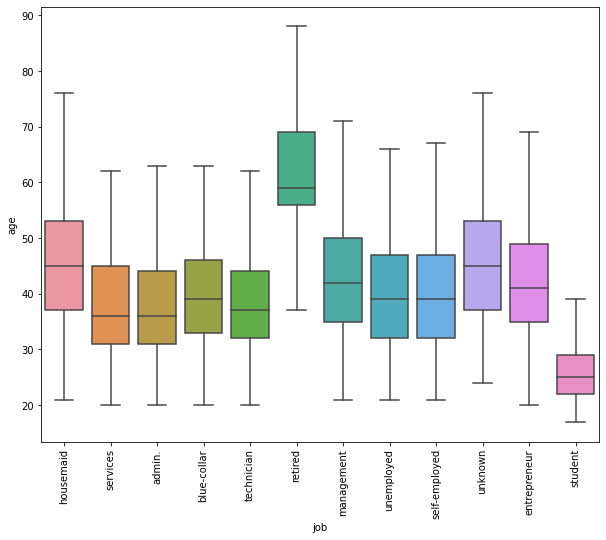

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x="job", y="age", data=dfsd,showfliers=False)
plt.xticks(rotation=90)

In [ ]:
dfsd.age.unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89])

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

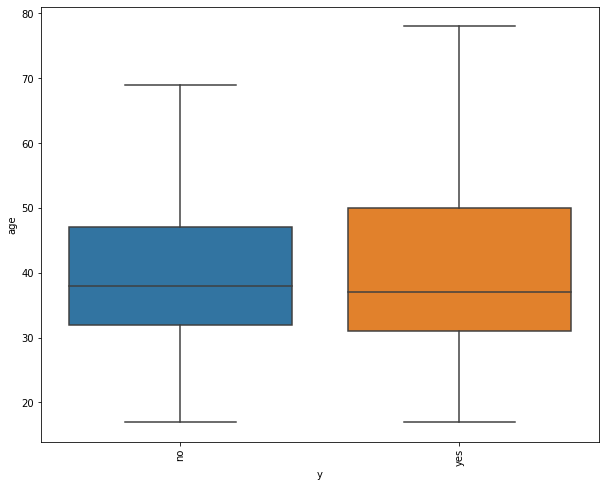

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x="y", y="age", data=dfsd,showfliers=False)
plt.xticks(rotation=90)

#ANALISIS MULTIVARIADO

Análisis de correspondencia

In [ ]:
!pip install prince
import prince

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
dfsd.age.unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89])

In [ ]:
dfsd['age_range'] = pd.cut(dfsd['age'],[0, 20, 40, 60, 80, 999])
dfsd['age_range'].value_counts().sort_index()

(0, 20]        140
(20, 40]     23621
(40, 60]     16506
(60, 80]       790
(80, 999]      119
Name: age_range, dtype: int64

In [ ]:
df = dfsd[['month', "day_of_week", "y", 'age_range' ]]
mca = prince.MCA()
mca.fit(df)

MCA()

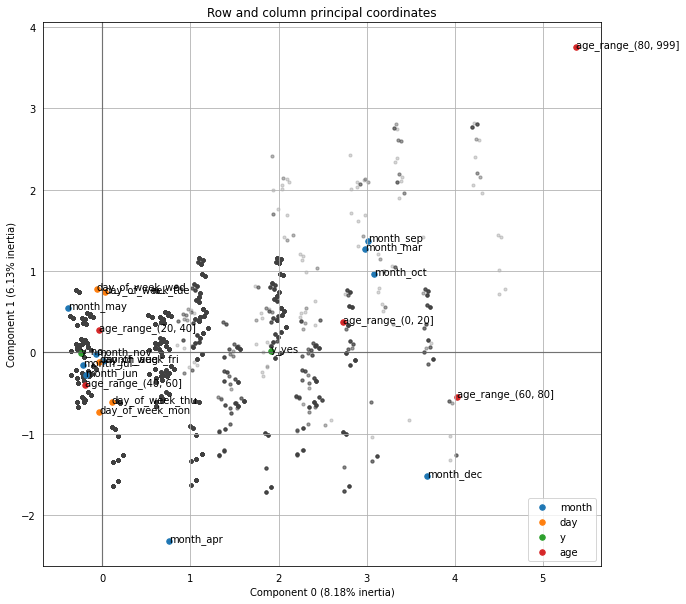

In [ ]:
mca.plot_coordinates(df, 
                     row_points_alpha=.2,
                     figsize=(10, 10),
                     show_column_labels=True
                    );

Analizando los meses en los que se realizó el contacto y la adhesión al plazo fijo, podemos decir que los contactos de marzo, septiembre, octubre y diciembre fueron los de mejor resultado.

En cuanto al día de la semana, no hay algún día que tenga una correspondencia con la adhesión al plazo fijo.

En cuanto al rango etario menos de 20 años y por encima de 60 son los que tienen mayor correspondencia con la adhesión y con los meses mencionados.

# CONCLUSIONES FINALES

Hasta el momento podemos decir que las variables que podrían ser consideradas como predictoras de suscripción a un plazo fijo son:
 
De los datos de clientes
- la edad 
- la educación 
- la ocupación 

De los datos de la campaña de marketing
- tipo de contacto
- mes de contacto


#ANEXO APIs

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
#files.upload()


In [ ]:
 #! mkdir ~/.kaggle

In [ ]:
#! cp kaggle.json ~/.kaggle/

In [ ]:
#!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#! kaggle datasets list

In [ ]:
#! kaggle datasets download -d ruchi798/data-science-job-salaries

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!mkdir '/content/drive/MyDrive/CODERHOUSE_DESAFIOS/'

mkdir: cannot create directory ‘/content/drive/MyDrive/CODERHOUSE_DESAFIOS/’: File exists


In [ ]:
!unzip data-science-job-salaries.zip -d '/content/drive/MyDrive/CODERHOUSE_DESAFIOS/'

unzip:  cannot find or open data-science-job-salaries.zip, data-science-job-salaries.zip.zip or data-science-job-salaries.zip.ZIP.


In [ ]:
import pandas as pd 
apids= pd.read_csv("/content/drive/MyDrive/CODERHOUSE_DESAFIOS/ds_salaries.csv",delimiter=",")
apids

Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
1             1       2020               SE              FT   
2             2       2020               SE              FT   
3             3       2020               MI              FT   
4             4       2020               SE              FT   
..          ...        ...              ...             ...   
602         602       2022               SE              FT   
603         603       2022               SE              FT   
604         604       2022               SE              FT   
605         605       2022               SE              FT   
606         606       2022               MI              FT   

                      job_title  salary salary_currency  salary_in_usd  \
0                Data Scientist   70000             EUR          79833   
1    Machine Learning Scientist  260000             USD         260000   
2             Big Data Engineer   85000             GBP         109024   
3          Product Data Analyst   20000             USD          20000   
4     Machine Learning Engineer  150000             USD         150000   
..                          ...     ...             ...            ...   
602               Data Engineer  154000             USD         154000   
603               Data Engineer  126000             USD         126000   
604                Data Analyst  129000             USD         129000   
605                Data Analyst  150000             USD         150000   
606                AI Scientist  200000             USD         200000   

    employee_residence  remote_ratio company_location company_size  
0                   DE             0               DE            L  
1                   JP             0               JP            S  
2                   GB            50               GB            M  
3                   HN             0               HN            S  
4                   US            50               US            L  
..                 ...           ...              ...          ...  
602                 US           100               US            M  
603                 US           100               US            M  
604                 US             0               US            M  
605                 US           100               US            M  
606                 IN           100               US            L  

[607 rows x 12 columns]

In [ ]:
apids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [ ]:
apids.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
apids.duplicated().value_counts()

False    607
dtype: int64